In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../data/processed/gridded-dataset.csv")
df['time'] = pd.to_datetime(df['time']) # Convert `time` to `datetime`
df['date'] = df['time'].dt.strftime('%m-%d-%Y') # Extract only the date part and format it
df.drop(columns='time', inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%Y')
df = df[['date', 'lat', 'lon', 'sst']]
df.set_index(['date', 'lat', 'lon'], inplace=True)

In [ ]:
print(df)

                                 sst
date       lat    lon               
2024-01-01 5.125  127.125  29.439999
                  127.375  29.570000
                  127.625  29.699999
                  127.875  29.810000
                  128.125  29.910000
...                              ...
2024-06-30 19.875 144.875  29.599998
                  145.125  29.630000
                  145.375  29.720000
                  145.625  29.800000
                  145.875  29.859999

[2489760 rows x 1 columns]


In [ ]:
print(df.shape)

(2489760, 1)


In [ ]:
print(df.index)

MultiIndex([('2024-01-01',  5.125, 127.125),
            ('2024-01-01',  5.125, 127.375),
            ('2024-01-01',  5.125, 127.625),
            ('2024-01-01',  5.125, 127.875),
            ('2024-01-01',  5.125, 128.125),
            ('2024-01-01',  5.125, 128.375),
            ('2024-01-01',  5.125, 128.625),
            ('2024-01-01',  5.125, 128.875),
            ('2024-01-01',  5.125, 129.125),
            ('2024-01-01',  5.125, 129.375),
            ...
            ('2024-06-30', 19.875, 143.625),
            ('2024-06-30', 19.875, 143.875),
            ('2024-06-30', 19.875, 144.125),
            ('2024-06-30', 19.875, 144.375),
            ('2024-06-30', 19.875, 144.625),
            ('2024-06-30', 19.875, 144.875),
            ('2024-06-30', 19.875, 145.125),
            ('2024-06-30', 19.875, 145.375),
            ('2024-06-30', 19.875, 145.625),
            ('2024-06-30', 19.875, 145.875)],
           names=['date', 'lat', 'lon'], length=2489760)


In [ ]:
# Aggregate SST by computing daily average
df_reset = df.reset_index()
daily_avg_sst = df_reset.groupby('date')['sst'].mean().reset_index()
daily_avg_sst.sort_values('date', inplace=True)

In [ ]:
print(daily_avg_sst)

          date        sst
0   2024-01-01  28.943655
1   2024-01-02  28.981403
2   2024-01-03  29.042894
3   2024-01-04  29.046002
4   2024-01-05  29.014890
..         ...        ...
177 2024-06-26  30.149940
178 2024-06-27  30.117995
179 2024-06-28  30.125019
180 2024-06-29  30.169469
181 2024-06-30  30.262543

[182 rows x 2 columns]


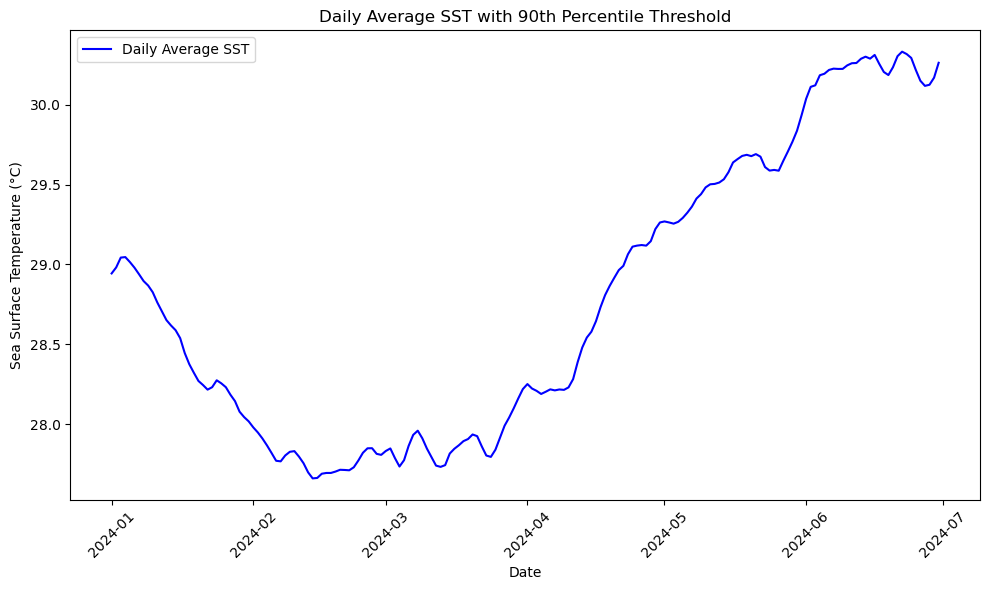

In [ ]:
# Plot the daily average SST
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_sst['date'], daily_avg_sst['sst'], label='Daily Average SST', color='b')
plt.xlabel('Date')
plt.ylabel('Sea Surface Temperature (°C)')
plt.title('Daily Average SST with 90th Percentile Threshold')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
daily_avg_sst.to_csv('../data/processed/gridded-dataset.csv', index=False)